#<b>Amazon review data scrapping and analysis

In [1]:
import requests
from bs4 import BeautifulSoup

## https://www.amazon.in/Nautica-Cruise-Nac-10-Stainless-Steel/product-reviews/B07ZPGTNRP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews


In [2]:
url2="https://www.amazon.in/Nautica-Cruise-Nac-10-Stainless-Steel/product-reviews/B07ZPGTNRP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [3]:
 headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}

In [4]:
page=requests.get(url2,headers=headers)

In [5]:
page

<Response [200]>

In [6]:
soup=BeautifulSoup(page.content,'html.parser')

In [7]:
# title of the page
print(soup.title)

# get attributes:
print(soup.title.name)

# get values:
print(soup.title.string)

# beginning navigation:
print(soup.title.parent.name)

# getting specific values:
print(soup.p)

<title>Amazon.in:Customer reviews: NAUTICA Analog Silver Dial Men's Watch-NAPNAI805</title>
title
Amazon.in:Customer reviews: NAUTICA Analog Silver Dial Men's Watch-NAPNAI805
meta
<p class="nav_p nav-bold"></p>


In [8]:
title = soup.find('span', { "class" : "a-profile-name"})
title.get_text()

'Gregory'

In [9]:
import numpy as np 
import pandas as pd #

--2020-10-03 05:57:54--  https://www.dropbox.com/s/vp8mjd5tm1jexzo/data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vp8mjd5tm1jexzo/data.csv [following]
--2020-10-03 05:57:54--  https://www.dropbox.com/s/raw/vp8mjd5tm1jexzo/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc62897dcca83c3f4b9dad2ef619.dl.dropboxusercontent.com/cd/0/inline/BAjH2aR8tvuYnePMoyCdtIhuSAOkd6KLfYFgwyoegrSrCfEmwWDoAXU_uNZRd8Sc5uzVLyR2Vx5PEaAC07qkZ3xVhToDNlDnLPtDzjtwPdNQ70S1ABbI_WJSVjN2gaffP5s/file# [following]
--2020-10-03 05:57:56--  https://uc62897dcca83c3f4b9dad2ef619.dl.dropboxusercontent.com/cd/0/inline/BAjH2aR8tvuYnePMoyCdtIhuSAOkd6KLfYFgwyoegrSrCfEmwWDoAXU_uNZRd8Sc5uzVLyR2Vx5PEaAC07qkZ3xVhToDNlDnLPtDzjtwPdNQ70S1ABbI_WJSVjN2ga

In [11]:
data=pd.read_csv("/content/data.csv")

In [12]:

data.head()

,title,content,date,variant,images,verified,author,rating,product,url
0,Look just like the photo,"I love the shoes they are true to size , I wea...",18 Sep 2018,Size: 8 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Diane Johnson,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
1,After 20 returns,Just writing a rare review on these . I love N...,08 May 2019,Size: 10 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,sherlain miranda,4.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
2,Half size up :),"I have only run in them a couple of times, but...",14 Dec 2018,Size: 9.5 Color: White/Metallic Silver/Dark Grey,https://images-na.ssl-images-amazon.com/images...,Yes,Blondie,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
3,Surprisingly comfortable,I have a very hard time finding shoes that are...,26 Aug 2018,Size: 8 Color: White/Metallic Silver/Dark Grey,NaN,Yes,E Diaz,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...
4,Cute and Stylish..,Great workout shoes. Very comfortable.,04 Sep 2017,NaN,https://images-na.ssl-images-amazon.com/images...,Yes,Angel Buchanan,5.0,Nike Women's Reax Run 5 Running Shoes,https://www.amazon.com/Nike-Womens-Reax-Runnin...


In [13]:
data.isna().any()

title       False
content     False
date        False
variant      True
images       True
verified    False
author      False
rating      False
product     False
url         False
dtype: bool

In [14]:
len(data)

20

In [15]:
data.describe()

,rating
count,20.000000
mean,4.200000
std,1.321881
min,1.000000
25%,3.750000
50%,5.000000
75%,5.000000
max,5.000000


In [16]:
data.columns

Index(['title', 'content', 'date', 'variant', 'images', 'verified', 'author',
       'rating', 'product', 'url'],
      dtype='object')

In [17]:
data.shape

(20, 10)

In [18]:
null_columns=pd.DataFrame({'Columns':data.isna().sum().index,'No. Null values':data.isna().sum().values,'Percentage':data.isna().sum().values/data.shape[0]})

In [19]:
null_columns

,Columns,No. Null values,Percentage
0,title,0,0.00
1,content,0,0.00
2,date,0,0.00
3,variant,9,0.45
4,images,12,0.60
5,verified,0,0.00
6,author,0,0.00
7,rating,0,0.00
8,product,0,0.00
9,url,0,0.00


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [21]:
data['date']= pd.to_datetime(data['date']) 

In [22]:
x=data['rating']
x=pd.to_numeric(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


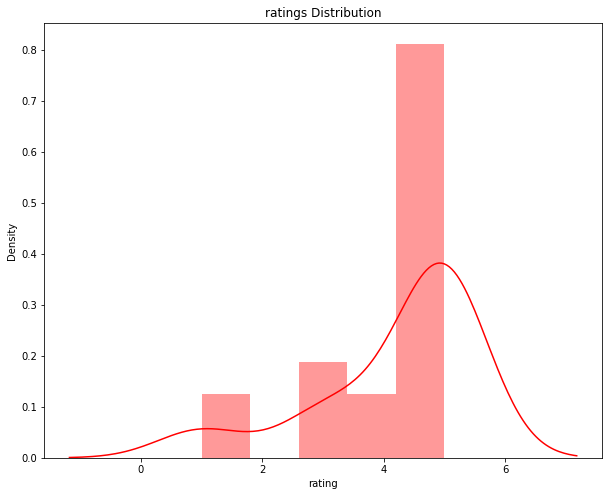

In [23]:
plt.figure(figsize=(10,8), )
plt.title('ratings Distribution')

sns.distplot(x,color='red');

In [24]:
type(x)

pandas.core.series.Series

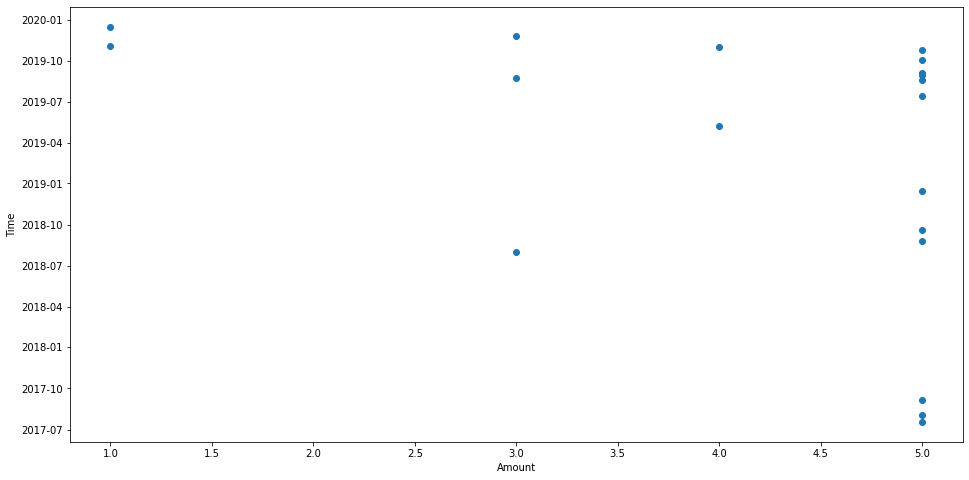

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['rating'], data['date'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()